In [1]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input

CLASSES = 2
    
# setup model
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
   
# transfer learning
for layer in base_model.layers:
    layer.trainable = False
      
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 32

TRAIN_DIR = './train'
TEST_DIR = './validation'

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 3798 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [5]:
EPOCHS = 5
BATCH_SIZE = 32
STEPS_PER_EPOCH = 320
VALIDATION_STEPS = 64

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)


Epoch 1/5
320/320 [==============================] - 76s 239ms/step - loss: 0.5192 - acc: 0.7490 - val_loss: 0.6445 - val_acc: 0.6914
Epoch 2/5
320/320 [==============================] - 77s 240ms/step - loss: 0.5209 - acc: 0.7541 - val_loss: 0.5481 - val_acc: 0.7549
Epoch 3/5
320/320 [==============================] - 77s 242ms/step - loss: 0.5200 - acc: 0.7529 - val_loss: 0.5779 - val_acc: 0.7314
Epoch 4/5
320/320 [==============================] - 77s 241ms/step - loss: 0.5136 - acc: 0.7555 - val_loss: 0.5508 - val_acc: 0.7222
Epoch 5/5
320/320 [==============================] - 77s 241ms/step - loss: 0.5182 - acc: 0.7545 - val_loss: 0.5523 - val_acc: 0.7461


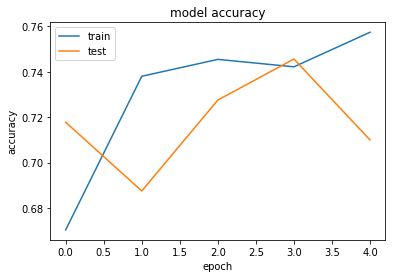

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()